In [ ]:
import zipfile
import os
import numpy as np
import pandas as pd
import glob
from tqdm.notebook import tqdm
import unicodedata
import re 
import wget
from datetime import datetime
import seaborn as sns

tqdm.pandas()

def limpar_texto(texto):
    # Se vazio, retorna
    if texto is None or len(texto.strip()) == 0:
        return texto

    # Remover acentos
    result = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')

    # Remover caracteres especiais
    lista = '-#?º°ª.:/;~^`[{]}\\|!$%"\'&*()=+,><\t\r\n…'
    for i in range(0, len(lista)):
        result = result.replace(lista[i], ' ')

    # Transformar multiplos espacos em apenas um
    result = re.sub(' +', ' ', result)

    # Transformar em LOWER case
    result = result.lower()

    return result

# Obter dados de Filiados (TSE)

In [1]:
df_filiados = []

# Obter arquivos .zip no diretorio atual
arquivos_zip = glob.glob("*.zip")

for arq_zip in arquivos_zip:
    print(arq_zip)

    # Abrir arquivo .zip
    archive = zipfile.ZipFile(arq_zip, 'r')
    for fname in archive.namelist():
        if fname.startswith("filiados") and fname.split(".")[-1] == "csv":
            # Abrir arquivo .csv dentro do arquivo .zip: Criar DataFrame
            df = pd.read_csv(archive.open(fname), encoding='latin1', sep=";", low_memory=False)
            df_filiados.append(df)
            print(fname)
    print("----")

filiados_prtb.zip
filiados_prtb.csv
----
filiados_dem.zip
filiados_dem.csv
----
filiados_pcb.zip
filiados_pcb.csv
----
filiados_pmn.zip
filiados_pmn.csv
----
filiados_phs.zip
filiados_phs.csv
----
filiados_rede.zip
filiados_rede.csv
----
filiados_republicanos.zip
filiados_republicanos.csv
----
filiados_novo.zip
filiados_novo.csv
----
20210721_Expulsoes.zip
----
filiados_dc.zip
filiados_dc.csv
----
20210721_Expulsoes (1).zip
----
filiados_mdb.zip
filiados_mdb.csv
----
filiados_pstu.zip
filiados_pstu.csv
----
filiados_pp.zip
filiados_pp.csv
----
filiados_avante.zip
filiados_avante.csv
----
filiados_psl.zip
filiados_psl.csv
----
filiados_pt.zip
filiados_pt.csv
----
filiados_psol.zip
filiados_psol.csv
----
filiados_patriota.zip
filiados_patriota.csv
----
filiados_pv.zip
filiados_pv.csv
----
filiados_pdt.zip
filiados_pdt.csv
----
filiados_pl.zip
filiados_pl.csv
----
filiados_solidariedade.zip
filiados_solidariedade.csv
----
filiados_cidadania.zip
filiados_cidadania.csv
----
filiados_psd.zip

In [2]:
# Checar tamanho
len(df_filiados)==36

True

In [3]:
# Concatenar lista de DataFrames em um único DataFrame
df_filiados = pd.concat(df_filiados, ignore_index=True)

In [4]:
df_filiados.shape

(24666625, 19)

In [5]:
# Padroniza colunas: Espaco vira Underscore e virar lowercase
df_filiados.columns = [col.replace(" ", "_").lower() for col in df_filiados.columns]

In [6]:
df_filiados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24666625 entries, 0 to 24666624
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   data_da_extracao        object 
 1   hora_da_extracao        object 
 2   numero_da_inscricao     object 
 3   nome_do_filiado         object 
 4   sigla_do_partido        object 
 5   nome_do_partido         object 
 6   uf                      object 
 7   codigo_do_municipio     int64  
 8   nome_do_municipio       object 
 9   zona_eleitoral          int64  
 10  secao_eleitoral         float64
 11  data_da_filiacao        object 
 12  situacao_do_registro    object 
 13  tipo_do_registro        object 
 14  data_do_processamento   object 
 15  data_da_desfiliacao     object 
 16  data_do_cancelamento    object 
 17  data_da_regularizacao   object 
 18  motivo_do_cancelamento  object 
dtypes: float64(1), int64(2), object(16)
memory usage: 3.5+ GB


In [7]:
df_filiados.head()

,data_da_extracao,hora_da_extracao,numero_da_inscricao,nome_do_filiado,sigla_do_partido,nome_do_partido,uf,codigo_do_municipio,nome_do_municipio,zona_eleitoral,secao_eleitoral,data_da_filiacao,situacao_do_registro,tipo_do_registro,data_do_processamento,data_da_desfiliacao,data_do_cancelamento,data_da_regularizacao,motivo_do_cancelamento
0,01/07/2021,22:19:48,9831503,TEREZA DE MARIA VAL COSTA,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PI,10391,BURITI DOS LOPES,33,29.0,28/09/2007,REGULAR,OFICIAL,NaN,NaN,NaN,NaN,NaN
1,01/07/2021,22:19:48,195981473,EDISON DE LIMA BATISTA,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,ES,57053,VITÓRIA,52,452.0,07/10/2011,CANCELADO,OFICIAL,NaN,NaN,08/12/2011,NaN,JUDICIAL
2,01/07/2021,22:19:48,196052631,RITA DE CASSIA COELHO DE ARAUJO PEIXOTO,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,RR,3123,PACARAIMA,7,70.0,18/08/2015,CANCELADO,OFICIAL,16/04/2020,NaN,16/04/2020,NaN,CANCELAMENTO AUTOMÁTICO
3,01/07/2021,22:19:48,196062615,REGNIER LAGO FONTELES,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,RR,3018,BOA VISTA,1,723.0,30/09/2005,CANCELADO,OFICIAL,NaN,20/06/2007,20/06/2007,NaN,JUDICIAL
4,01/07/2021,22:19:48,196170272,EDVALDO CUNHA,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,MG,40495,AMPARO DO SERRA,268,100.0,07/10/2011,CANCELADO,OFICIAL,NaN,NaN,NaN,NaN,NaN


In [8]:
colunas_selecionadas = ['numero_da_inscricao','nome_do_filiado', 'sigla_do_partido', 'uf', 'data_da_filiacao',
                       'situacao_do_registro', 'tipo_do_registro', 'data_do_processamento',
                       'data_da_desfiliacao', 'data_do_cancelamento', 'data_da_regularizacao',
                       'motivo_do_cancelamento']

In [9]:
# Filtrar: Deixar apenas as colunas selecionadas
df_filiados = df_filiados[colunas_selecionadas]

In [10]:
df_filiados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24666625 entries, 0 to 24666624
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   numero_da_inscricao     object
 1   nome_do_filiado         object
 2   sigla_do_partido        object
 3   uf                      object
 4   data_da_filiacao        object
 5   situacao_do_registro    object
 6   tipo_do_registro        object
 7   data_do_processamento   object
 8   data_da_desfiliacao     object
 9   data_do_cancelamento    object
 10  data_da_regularizacao   object
 11  motivo_do_cancelamento  object
dtypes: object(12)
memory usage: 2.2+ GB


In [30]:
# Verificar se todos os 'numero_da_inscricao' sao numeros (veio como object)
is_inscricao_numero = lambda x: str(x).isdigit()
df_filiados[~df_filiados.numero_da_inscricao.apply(is_inscricao_numero)]

,numero_da_inscricao,nome_do_filiado,sigla_do_partido,uf,data_da_filiacao,situacao_do_registro,tipo_do_registro,data_do_processamento,data_da_desfiliacao,data_do_cancelamento,data_da_regularizacao,motivo_do_cancelamento
22916873,VANDERLUCE G,VANIA GOMES GALDINO,PSDB,MG,16/03/1989,CANCELADO,OFICIAL,NaN,02/05/2013,03/06/2013,NaN,NaN


In [32]:
# Manter apenas os registros com 'numero_da_inscricao' como numeros (remove o registro encontrado acima)
df_filiados = df_filiados[df_filiados.numero_da_inscricao.apply(is_inscricao_numero)]
df_filiados.shape

(24666624, 12)

In [33]:
# Padroniza tipos de dados

for col in df_filiados.columns:
    if col.startswith("data"):
        df_filiados[col] = pd.to_datetime(df_filiados[col], format='%d/%m/%Y', errors='coerce')
    
    elif col == "numero_da_inscricao":
        df_filiados[col] = df_filiados[col].astype('float64')
#     else:
#         df_filiados[col] = df_filiados[col].astype('category')
    print(col)

<ipython-input-33-14bf6baa96f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filiados[col] = df_filiados[col].astype('float64')


numero_da_inscricao
nome_do_filiado
sigla_do_partido
uf


<ipython-input-33-14bf6baa96f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filiados[col] = pd.to_datetime(df_filiados[col], format='%d/%m/%Y', errors='coerce')


data_da_filiacao
situacao_do_registro
tipo_do_registro
data_do_processamento
data_da_desfiliacao
data_do_cancelamento
data_da_regularizacao
motivo_do_cancelamento


In [34]:
df_filiados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24666624 entries, 0 to 24666624
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   numero_da_inscricao     float64       
 1   nome_do_filiado         object        
 2   sigla_do_partido        object        
 3   uf                      object        
 4   data_da_filiacao        datetime64[ns]
 5   situacao_do_registro    object        
 6   tipo_do_registro        object        
 7   data_do_processamento   datetime64[ns]
 8   data_da_desfiliacao     datetime64[ns]
 9   data_do_cancelamento    datetime64[ns]
 10  data_da_regularizacao   datetime64[ns]
 11  motivo_do_cancelamento  object        
dtypes: datetime64[ns](5), float64(1), object(6)
memory usage: 2.4+ GB


In [201]:
# Limpa 'nome_do_filiado'
df_filiados.nome_do_filiado = df_filiados.nome_do_filiado.progress_apply(limpar_texto)

/Users/ricardosc/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [228]:
# Verificando UF
df_filiados.uf.value_counts()

SP    4558506
MG    2600817
RS    1978648
PR    1544081
RJ    1539151
BA    1497958
SC    1312522
GO    1061308
MA     888154
PA     878338
PE     844449
CE     794672
MT     554737
PB     540264
ES     494575
MS     477162
PI     469776
RN     411581
AM     395197
TO     340912
AL     291870
DF     286957
SE     267382
RO     250232
AP     161085
AC     121377
RR      93964
ZZ      10949
Name: uf, dtype: int64

- Veja que temos (além de 26 estados + DF) um adicional: ZZ

# Obter dados do CEAF

In [202]:
url_base = "http://transparencia.gov.br/download-de-dados/ceaf/20210721"
diretorio_destino = "."

# Download do arquivo .zip do CEAF
file_name = wget.download(url_base, out=diretorio_destino)
file_name

'./20210721_Expulsoes (1).zip'

In [203]:
# Abrir arquivo .zip
archive = zipfile.ZipFile(file_name, 'r')

# Abrir .csv dentro do .zip: Criar DataFrame
arq_csv = archive.open(archive.namelist()[0])
df_ceaf = pd.read_csv(arq_csv, encoding='latin1', sep=";", low_memory=False)
df_ceaf.shape

(5348, 14)

In [204]:
# Padronizar colunas: limpar e fazer espacos virarem underscore
df_ceaf.columns = [limpar_texto(col).replace(" ", "_") for col in df_ceaf.columns]

In [205]:
df_ceaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348 entries, 0 to 5347
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   nome                                       5348 non-null   object
 1   cpf                                        5346 non-null   object
 2   matricula                                  5347 non-null   object
 3   orgao_de_lotacao                           5348 non-null   object
 4   uf_lotacao                                 5348 non-null   object
 5   cargo_efetivo                              4854 non-null   object
 6   cargo_ou_funcao_de_confianca               554 non-null    object
 7   numero_de_portaria_de_punicao              5337 non-null   object
 8   data_de_publicacao_da_portaria_de_punicao  5348 non-null   object
 9   pagina                                     5348 non-null   object
 10  secao                               

In [206]:
df_ceaf.head()

,nome,cpf,matricula,orgao_de_lotacao,uf_lotacao,cargo_efetivo,cargo_ou_funcao_de_confianca,numero_de_portaria_de_punicao,data_de_publicacao_da_portaria_de_punicao,pagina,secao,tipo_de_punicao,numero_do_processo_administrativo,fundamento_legal
0,CARLOS EDUARDO VIANNA ALDIGHIERI SOARES,***.012.877-**,135****,UFG,GO,PROFESSOR DO MAGISTERIO SUPERIOR,NaN,822,13/03/2020,37,2,DEMISSÃO,23070.015881/2019-53,8112-139 - Entende-se por inassiduidade habitu...
1,MAGDA APARECIDA DA R T SILVA,***.494.048-**,093****,INSS,SP,Técnico do Seguro Social,NaN,10,08/01/2014,030,2,CASSAÇÃO DE APOSENTADORIA,35664.000184/2011-40,8112-117-IX - Valer-se do cargo para lograr pr...
2,JOADIR GONCALVES DA SILVA,***.651.091-**,014****,SRF,MT,TECNICO DA RECEITA FEDERAL,NaN,360,19/10/2005,016,2,DEMISSÃO,10166.011783/2001-15,8112-132-IV - Improbidade administrativa; 8112...
3,CANDIDO PEREIRA FILHO,***.621.258-**,137****,INSS,SP,TÉCNICO DO SEGURO SOCIAL,NaN,145,26/11/2015,47,2,DEMISSÃO,35664.000197/2011-19,8112-132-XIII - Transgressão dos incisos IX a ...
4,ANDRE FERNANDEZ,***.537.718-**,220****,SRF,AM,Auditor-Fiscal da Receita Federal do Brasil,NaN,277,09/08/2012,021,2,DEMISSÃO,16307.000013/2008-30,8112-132-XIII - Transgressão dos incisos IX a ...


In [207]:
# Leis/Artigos/Incisos RELACIONADOS com práticas de CORRUPÇÃO
leis_corrupcao = ['8429', 'CLT-482-a', 'CLT-482-c',
                  '8112-132-I','8112-132-IV','8112-132-VIII','8112-132-IX','8112-132-X','8112-132-XI',
                  '8112-117-IX','8112-117-XII','8112-117-XI',
                  '8112-117-X','8112-117-XVI','8112-117-XIII',
                  '4878-43-XIII','4878-43-IX','4878-43-XIV','4878-43-XLVIII','4878-43-LIII','4878-43-LXI']

In [208]:
# Ficaremos apenas com os expulsos por motivos de corrupção

def is_corrupcao(fundamento):
    for lei in leis_corrupcao:
        if str(fundamento).startswith(lei):
            return True
    return False

df_ceaf['corrupcao'] = df_ceaf.fundamento_legal.apply(is_corrupcao)

In [209]:
df_ceaf.corrupcao.value_counts()

True     4190
False    1158
Name: corrupcao, dtype: int64

In [210]:
# Filtrar mantendo apenas os expulsos por corrupção
df_ceaf = df_ceaf[df_ceaf.corrupcao]
df_ceaf.shape

(4190, 15)

In [212]:
# Limpa 'nome'
df_ceaf.nome = df_ceaf.nome.apply(limpar_texto)

In [213]:
df_ceaf.nome.nunique()

3566

In [214]:
# Nomes com mais de um registro no CEAF ?
repetidos_pun = df_ceaf.groupby(["nome"]).filter(lambda x: len(x['nome']) > 1)['nome'].unique()
repetidos_pun.shape

(443,)

In [215]:
# Nomes com mais de um CPF no CEAF ? Ambiguidade de CPF!
repetidos = df_ceaf.groupby(["nome"]).filter(lambda x: len(set(x['cpf'])) > 1)[['nome','cpf']].drop_duplicates()
repetidos

,nome,cpf
1493,joao batista da silva,***.794.814-**
2112,marcos antonio de souza,***.054.977-**
2767,roberto goncalves,***.159.257-**
3855,marcos antonio de souza,***.111.341-**
4341,joao batista da silva,***.430.072-**
4356,roberto goncalves,***.706.108-**


In [216]:
# Listar nomes com problema de ambiguidade de CPF
nomes_repetidos = np.unique(repetidos['nome'].values)
nomes_repetidos

array(['joao batista da silva', 'marcos antonio de souza',
       'roberto goncalves'], dtype=object)

In [217]:
# ELIMINAR nomes com problema de ambiguidade de CPF
df_ceaf = df_ceaf[~(df_ceaf.nome.isin(nomes_repetidos))]
df_ceaf.shape

(4183, 15)

In [230]:
df_ceaf.uf_lotacao.value_counts()

RJ    764
SP    517
DF    465
MG    205
PR    197
PA    193
PE    165
MT    160
AM    151
BA    143
SC    131
RS    129
MA    117
MS    110
CE    101
RO     86
GO     77
AP     72
ES     60
RR     59
PB     58
AL     58
TO     46
RN     41
PI     33
SE     24
AC     21
Name: uf_lotacao, dtype: int64

# Juntar CEAF com Filiados

Limitação:
- Não temos identificador único comum nas bases
- Usamos outros campos para tentar minimizar chances de erro
    - Nome (CEAF) = Nome_do_Filiado (TSE)
    - UF_Lotação (CEAF) = UF (TSE)

In [218]:
# Merge por NOME e UF
# PODE DEMORAR UM POUCO PARA EXECUTAR
df_main = pd.merge(df_ceaf, df_filiados, left_on=["nome","uf_lotacao"], right_on=["nome_do_filiado","uf"], how="inner", sort=False)

In [219]:
df_main.shape

(5962, 27)

In [231]:
df_main[['nome','cpf','uf','numero_da_inscricao','sigla_do_partido']].head()

,nome,cpf,uf,numero_da_inscricao,sigla_do_partido
0,eudes andre da silva,***.143.754-**,PE,4.236364e+10,PODE
1,eudes andre da silva,***.143.754-**,PE,4.236364e+10,PCDOB
2,flares de souza,***.992.849-**,SC,9.169501e+09,MDB
3,flares de souza,***.992.849-**,SC,9.169501e+09,CIDADANIA
4,osvaldo ferreira da silva,***.531.231-**,GO,1.239720e+10,REPUBLICANOS


In [220]:
# Quantidades unicas individualmente: Nome, CPF e Numero_da_Inscricao
df_main.nome.nunique(), df_main.cpf.nunique(), df_main.numero_da_inscricao.nunique()

(1054, 1053, 4219)

In [232]:
# EXEMPLO de repeticao
df_main[df_main.nome=='osvaldo ferreira da silva'].sort_values("numero_da_inscricao")[['nome','cpf','uf','numero_da_inscricao','sigla_do_partido']]

,nome,cpf,uf,numero_da_inscricao,sigla_do_partido
7,osvaldo ferreira da silva,***.531.231-**,GO,3.933691e+09,MDB
11,osvaldo ferreira da silva,***.531.231-**,GO,1.139861e+10,PDT
5,osvaldo ferreira da silva,***.531.231-**,GO,1.150878e+10,MDB
10,osvaldo ferreira da silva,***.531.231-**,GO,1.150878e+10,PT
4,osvaldo ferreira da silva,***.531.231-**,GO,1.239720e+10,REPUBLICANOS
8,osvaldo ferreira da silva,***.531.231-**,GO,1.325695e+10,PP
6,osvaldo ferreira da silva,***.531.231-**,GO,1.855696e+10,MDB
12,osvaldo ferreira da silva,***.531.231-**,GO,2.512797e+10,PSDB
9,osvaldo ferreira da silva,***.531.231-**,GO,3.317389e+10,PP


**Fonte**: https://www.tre-rs.jus.br/eleitor/duvidas-frequentes/filiacao-partidaria


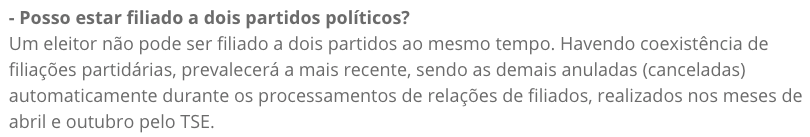

In [233]:
# Verificar MULTIPLAS inscricoes
mult_inscricoes = df_main.groupby(['nome','cpf','uf']).filter(lambda x: len(set(x['numero_da_inscricao'])) > 1 )
mult_inscricoes

,nome,cpf,matricula,orgao_de_lotacao,uf_lotacao,cargo_efetivo,cargo_ou_funcao_de_confianca,numero_de_portaria_de_punicao,data_de_publicacao_da_portaria_de_punicao,pagina,...,sigla_do_partido,uf,data_da_filiacao,situacao_do_registro,tipo_do_registro,data_do_processamento,data_da_desfiliacao,data_do_cancelamento,data_da_regularizacao,motivo_do_cancelamento
4,osvaldo ferreira da silva,***.531.231-**,054****,MS,GO,Auxiliar Operacional de Serviços Diversos,NaN,3.175,30/11/2017,53,...,REPUBLICANOS,GO,2012-04-16,REGULAR,OFICIAL,NaT,NaT,NaT,NaT,NaN
5,osvaldo ferreira da silva,***.531.231-**,054****,MS,GO,Auxiliar Operacional de Serviços Diversos,NaN,3.175,30/11/2017,53,...,MDB,GO,1988-04-05,CANCELADO,OFICIAL,NaT,2006-12-15,2006-12-15,NaT,JUDICIAL
6,osvaldo ferreira da silva,***.531.231-**,054****,MS,GO,Auxiliar Operacional de Serviços Diversos,NaN,3.175,30/11/2017,53,...,MDB,GO,2000-04-14,REGULAR,OFICIAL,NaT,NaT,NaT,NaT,NaN
7,osvaldo ferreira da silva,***.531.231-**,054****,MS,GO,Auxiliar Operacional de Serviços Diversos,NaN,3.175,30/11/2017,53,...,MDB,GO,1991-12-03,REGULAR,OFICIAL,NaT,NaT,NaT,NaT,NaN
8,osvaldo ferreira da silva,***.531.231-**,054****,MS,GO,Auxiliar Operacional de Serviços Diversos,NaN,3.175,30/11/2017,53,...,PP,GO,2003-09-29,REGULAR,OFICIAL,NaT,NaT,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,vanderlei jose de oliveira,***.246.251-**,088****,ME,GO,AGENTE DE SERVICOS DIVERSOS,NaN,231,03/06/2020,8,...,CIDADANIA,GO,2003-10-02,CANCELADO,OFICIAL,NaT,NaT,2016-04-15,NaT,CANCELAMENTO AUTOMÁTICO
5918,vanderlei jose de oliveira,***.246.251-**,088****,ME,GO,AGENTE DE SERVICOS DIVERSOS,NaN,231,03/06/2020,8,...,PTB,GO,2011-09-29,CANCELADO,OFICIAL,NaT,2011-11-07,2019-10-15,NaT,CANCELAMENTO AUTOMÁTICO
5919,vanderlei jose de oliveira,***.246.251-**,088****,ME,GO,AGENTE DE SERVICOS DIVERSOS,NaN,231,03/06/2020,8,...,PSDB,GO,2016-03-09,CANCELADO,OFICIAL,2020-04-16,NaT,2020-04-16,NaT,CANCELAMENTO AUTOMÁTICO
5920,vanderlei jose de oliveira,***.246.251-**,088****,ME,GO,AGENTE DE SERVICOS DIVERSOS,NaN,231,03/06/2020,8,...,PSDB,GO,2003-09-30,REGULAR,OFICIAL,NaT,NaT,NaT,NaT,NaN


In [234]:
# Isolar indices dos registros com MULTIPLAS inscricoes
indices_duplicados = mult_inscricoes.index.values
indices_duplicados

array([   4,    5,    6, ..., 5919, 5920, 5921])

In [235]:
# DELETAR registros com MULTIPLAS inscricoes
df_main.drop(indices_duplicados, axis=0, inplace=True)

In [238]:
df_main.shape

(1398, 27)

In [239]:
df_main.nome.nunique(), df_main.cpf.nunique(), df_main.numero_da_inscricao.nunique()

(846, 846, 846)

# Buscar Filiações relacionadas

- Acima filtramos por UF por não termos identificador comum.
- No entanto, agora temos o numero_da_inscricao
- Portanto, podemos ver se cada numero_da_inscricao tem outras filiações relacionadas

In [241]:
# Vamos manter apenas o identificador (numero_da_inscricao) e cpf (por precaução)
colunas_finais_ceaf = ["cpf","numero_da_inscricao"]
colunas_finais_ceaf

['cpf', 'numero_da_inscricao']

In [242]:
# Manter apenas colunas_finais_ceaf
df_main = df_main[colunas_finais_ceaf]

# Eliminar registros duplicados
df_main = df_main.drop_duplicates()
df_main

,cpf,numero_da_inscricao
0,***.143.754-**,4.236364e+10
2,***.992.849-**,9.169501e+09
13,***.836.227-**,1.229344e+11
14,***.259.219-**,9.793271e+09
16,***.558.338-**,1.563754e+11
...,...,...
5956,***.848.936-**,4.557132e+09
5957,***.928.867-**,8.232037e+10
5959,***.146.839-**,5.978391e+09
5960,***.193.607-**,2.452568e+11


In [244]:
df_main.shape

(846, 2)

In [245]:
# Buscar outras filiações via numero_da_inscricao
# PODE DEMORAR UM POUCO PARA EXECUTAR
df_final = pd.merge(df_main, df_filiados, on="numero_da_inscricao", how="inner", sort=False)

In [246]:
df_final.shape

(1193, 13)

In [247]:
df_final.nome_do_filiado.nunique(), df_final.cpf.nunique(), df_final.numero_da_inscricao.nunique()

(846, 846, 846)

In [248]:
# Existe algum numero_da_inscricao com MAIS DE UM nome ?
df_final.groupby(["numero_da_inscricao"]).filter(lambda x: len(set(x['nome_do_filiado'])) > 1)[['numero_da_inscricao','nome_do_filiado','cpf']].drop_duplicates()

,numero_da_inscricao,nome_do_filiado,cpf


In [249]:
# Existe algum nome com MAIS DE UM cpf ?
df_final.groupby(["nome_do_filiado"]).filter(lambda x: len(set(x['cpf'])) > 1)[['nome_do_filiado','cpf']].drop_duplicates()

,nome_do_filiado,cpf


In [250]:
# Existe algum nome com MAIS DE UM numero_da_inscricao ?
df_final.groupby(["nome_do_filiado"]).filter(lambda x: len(set(x['numero_da_inscricao'])) > 1)[['nome_do_filiado','numero_da_inscricao']].drop_duplicates()

,nome_do_filiado,numero_da_inscricao


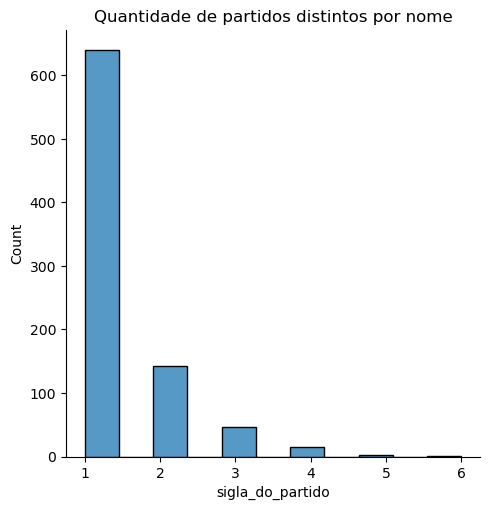

In [258]:
# PLOTAR QUANTIDADES DE PARTIDOS
sns.displot(data=df_final.groupby('nome_do_filiado').sigla_do_partido.nunique().reset_index(), 
            kind="hist", x="sigla_do_partido").set(title="Quantidade de partidos distintos por nome")

# Salvar resultados

### CEAF

In [259]:
# Salvar em arquivo pickle
df_final.to_pickle("df_ceaf.pickle")

### Filiados

- Obter amostra aleatória para comparação futura
- Apenas os registros que não foram incluídos no DataFrame do CEAF

In [260]:
df_filiados.shape

(24666624, 12)

In [261]:
# Eliminar aqueles presentes no DataFrame final do CEAF
# PODE DEMORAR UM POUCO PARA EXECUTAR
df_filiados_final = df_filiados[~df_filiados.numero_da_inscricao.isin(df_final.numero_da_inscricao)]
df_filiados_final.shape

(24665431, 12)

In [262]:
# Obter amosra de 1%
df_filiados_final = df_filiados_final.sample(frac=0.01, replace=False, random_state=171)

In [263]:
df_filiados_final.shape

(246654, 12)

In [265]:
# Salvar em arquivo pickle
df_filiados_final.to_pickle("df_filiados.pickle")